## Plot interactions and embeddings

In [138]:
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd

In [139]:


def bar_plot(data, title='Performance for observation', resource_name='test.png', legend=['Random Forest', 'Logistic Regression']):
    plt.style.use('ggplot')
    # fig, ax = plt.subplots(nrows=1, ncols=1)
    fig, axs = plt.subplots(1, 2)
    fig.suptitle(title)
    data[0].plot(kind='bar', ax=axs[0])
    data[1].plot(kind='bar', ax=axs[1])

    indices = range(data[0].shape[0])
    labels = data[0][0].to_list()

    for ax in axs.flat:
        ax.set(ylabel='balanced accuracy')
        ax.set_ylim([0,1])
        ax.grid(color='lightgray', linestyle='--', linewidth=1)
        ax.set_facecolor('w')
        ax.legend(legend, loc='lower right', fontsize=10)
        ax.axhline(y = 0.5, color = 'dimgrey', linestyle = '--', linewidth=1)

    axs[0].set_title('Gender inference', fontsize=10)
    axs[1].set_title('Age inference', fontsize=10)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    plt.setp(axs, xticks=indices, xticklabels=labels)

    plt.gca().set_facecolor('w')
    fig.patch.set_facecolor('w')
    fig.tight_layout()
    plt.savefig('paper_plot_fig/'+ resource_name)


phases = ['interaction', 'embedding']

def load_and_plot(step):
    # age
    age_rf = pd.read_csv('paper_plot_sample/' + step + 's/age_inference_random-forest.csv', header=None)
    age_lr = pd.read_csv('paper_plot_sample/' + step + 's/age_inference_logistic-regression.csv', header=None)

    #gender
    gender_rf = pd.read_csv('paper_plot_sample/' + step + 's/gender_inference_random-forest.csv', header=None)
    gender_lr = pd.read_csv('paper_plot_sample/' + step + 's/gender_inference_logistic-regression.csv', header=None)

    age_df = age_rf.merge(age_lr, on=0)
    age_df.rename(columns={'1_x': 'Random Forest', '1_y': 'Logistic Regression'}, inplace=True)
    gender_df = gender_rf.merge(gender_lr, on=0)
    gender_df.rename(columns={'1_x': 'Random Forest', '1_y': 'Logistic Regression'}, inplace=True)

    bar_plot([gender_df, age_df], title=str(str.upper(step[0]) + step[1:] + 's level'), resource_name=str(step + 's.png'))


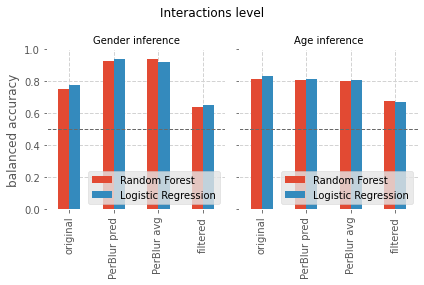

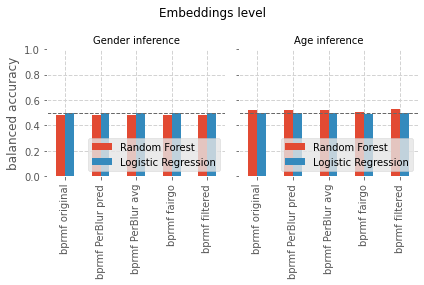

In [140]:
for p in phases:
    load_and_plot(p)

## Plot relevances and recs

In [141]:
def load(step, model, label):
    return pd.read_csv('paper_plot_sample/' + step + 's/'+ model + '_' + label + '.csv', header=None)

labels = ['age', 'gender']
models = ['user-knn', 'bprmf', 'wrmf', 'multidae']

In [142]:
from functools import reduce

gender_relevances = [load('relevance', model, labels[1]) for model in models]
gender_relevances_final = reduce(lambda left,right: pd.merge(left,right,on=0), gender_relevances)
gender_relevances_final

/var/folders/0r/m1t8hv6s7l9bsyqckwntb9qm0000gn/T/ipykernel_965/2733516564.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x'} in the result is deprecated and will raise a MergeError in a future version.
  gender_relevances_final = reduce(lambda left,right: pd.merge(left,right,on=0), gender_relevances)


,0,1_x,1_y,1_x,1_y
0,original,0.611291,0.662885,0.500000,0.698860
1,PerBlur pred,0.640516,0.802061,0.666973,0.749482
2,PerBlur avg,0.662945,0.802061,0.666973,0.749482
3,fairgo,0.000000,0.651188,0.000000,0.000000
4,filtered,0.573648,0.544141,0.500000,0.586180


In [143]:
age_relevances = [load('relevance', model, labels[0]) for model in models]
age_relevances_final = reduce(lambda left,right: pd.merge(left,right,on=0), age_relevances)
age_relevances_final

/var/folders/0r/m1t8hv6s7l9bsyqckwntb9qm0000gn/T/ipykernel_965/3846226106.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x'} in the result is deprecated and will raise a MergeError in a future version.
  age_relevances_final = reduce(lambda left,right: pd.merge(left,right,on=0), age_relevances)


,0,1_x,1_y,1_x,1_y
0,original,0.659120,0.660101,0.614365,0.724553
1,PerBlur pred,0.642628,0.672970,0.600583,0.690190
2,PerBlur avg,0.631061,0.672970,0.600583,0.690190
3,fairgo,0.000000,0.657624,0.000000,0.000000
4,filtered,0.578073,0.525803,0.500000,0.603337


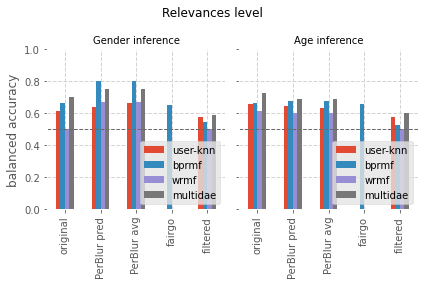

In [144]:
bar_plot([gender_relevances_final, age_relevances_final], title='Relevances level', resource_name=str('relevances.png'), legend=models)